In [3]:
import urllib.request
import zipfile

# Download GloVe embeddings
url = "https://nlp.stanford.edu/data/glove.6B.zip"
urllib.request.urlretrieve(url, "glove.6B.zip")

# Unzip
with zipfile.ZipFile("glove.6B.zip", 'r') as zip_ref:
    zip_ref.extractall()

# You can use glove.6B.50d.txt (50 dimensions)
# or glove.6B.100d.txt (100 dimensions)

In [5]:
import numpy as np
glove_embeddings = dict()
f = open('glove.6B.50d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    glove_embeddings[word] = coefs
f.close()

In [6]:
print(glove_embeddings['frog'])

[ 0.61038  -0.20757  -0.71951   0.89304   0.32482   0.76564   0.1814
 -0.33086   0.79173  -0.31664   0.011143  0.45412   1.5992    0.013494
 -0.093646  0.19245   0.251     1.1277   -1.0897   -0.42909  -1.1327
 -0.90465   0.5617   -0.058464  1.0007   -0.39017  -0.41665   0.73721
 -0.53824  -0.95993   0.67929  -0.59053   0.13408   0.54273  -0.36615
  0.014978 -0.2496   -0.81088   0.078905 -0.97552  -0.66394  -0.18508
 -0.87174   0.30782   1.2839   -0.14884   0.62178  -1.509     0.14582
 -0.31682 ]


In [8]:
from collections import Counter
from collections import Counter
from typing import List, Dict, Tuple, Union
import re

# Assuming the tokenize function is defined elsewhere
def tokenize(text):
    # Tokenization logic, removing HTML and stopwords as discussed earlier
    soup = BeautifulSoup(text, "html.parser")
    cleaned_text = soup.get_text()
    tokens = cleaned_text.lower().split()
    filtered_tokens = [token for token in tokens if token not in stopwords]
    return filtered_tokens

def tokenize_glove_style(text):
    """
    Tokenize text to match GloVe's preprocessing
    """
    # Remove HTML
    text = BeautifulSoup(text, "html.parser").get_text()

    # Convert to lowercase
    text = text.lower()

    # Replace numbers with '0'
    text = re.sub(r'\d', '0', text)

    # Split on whitespace and punctuation
    # GloVe keeps punctuation as separate tokens
    text = re.sub(r'([.,!?()])', r' \1 ', text)
    text = re.sub(r'\s{2,}', ' ', text)

    return text.split()

def build_vocab(sentences, max_vocab_size=10000):
    counter = Counter()
    for text in sentences:
        counter.update(tokenize(text))

    # Take only the top max_vocab_size-1 most frequent words (leave room for special tokens)
    most_common = counter.most_common(max_vocab_size - 2)  # -2 for <pad> and <unk>

    # Create vocabulary with indices starting from 2
    vocab = {word: idx + 2 for idx, (word, _) in enumerate(most_common)}
    vocab['<pad>'] = 0  # Add padding token
    vocab['<unk>'] = 1  # Add unknown token
    return vocab

# When building vocabulary:
def build_vocab_glove(sentences, max_vocab_size=10000):
    counter = Counter()
    for text in sentences:
        counter.update(tokenize_glove_style(text))

    # Take most frequent words
    most_common = counter.most_common(max_vocab_size - 2)

    # Create vocabulary with indices starting from 2
    vocab = {word: idx + 2 for idx, (word, _) in enumerate(most_common)}
    vocab['<pad>'] = 0
    vocab['<unk>'] = 1

    return vocab

def texts_to_sequences(sentences, word_index):
    sequences = []
    for sentence in sentences:
        sequence = []
        for word in tokenize_glove_style(sentence):
            # Use unknown token (1) for words not in vocabulary
            sequence.append(word_index.get(word, 1))
        sequences.append(sequence)
    return sequences

def pad_sequences(sequences, max_len):
    padded_sequences = []
    for seq in sequences:
        if len(seq) > max_len:
            padded_seq = seq[:max_len]
        else:
            padded_seq = seq + [0] * (max_len - len(seq))
        padded_sequences.append(padded_seq)
    return padded_sequences

def word_frequency(sentences, word_dict):
    frequency = {word: 0 for word in word_dict}

    for sentence in sentences:
        words = sentence.lower().split()
        for word in words:
            if word in frequency:
                frequency[word] += 1

    return frequency

def word_frequency_glove(sentences, vocab=None):
    """
    Count word frequencies in sentences and return sorted results
    Args:
        sentences: List of sentences
        vocab: Optional vocabulary to filter words (if None, count all words)
    Returns:
        List of tuples (word, count) sorted by count in descending order
    """
    counter = Counter()

    # Count frequencies using the same tokenization
    for sentence in sentences:
        tokens = tokenize_glove_style(sentence)
        counter.update(tokens)

    # If vocab is provided, only keep words in vocab
    if vocab is not None:
        counter = Counter({word: count for word, count in counter.items() if word in vocab})

    # Sort by frequency (descending) and then alphabetically for ties
    sorted_words = sorted(counter.items(), key=lambda x: (-x[1], x[0]))

    return sorted_words


In [9]:
# Handling Stop Words
import json


from bs4 import BeautifulSoup
import string

stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how",
             "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself",
             "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should",
             "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then",
             "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were",
             "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why",
             "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself",
             "yourselves"]

table = str.maketrans('', '', string.punctuation)

In [10]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json


with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = []
labels = []
urls = []
for item in datastore:
    sentence = item['headline'].lower()
    sentence = sentence.replace(",", " , ")
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("-", " - ")
    sentence = sentence.replace("/", " / ")
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    words = sentence.split()
    filtered_sentence = ""
    for word in words:
        word = word.translate(table)
        if word not in stopwords:
            filtered_sentence = filtered_sentence + word + " "
    sentences.append(filtered_sentence)
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

xs=[]
ys=[]
current_item=1
for item in sentences:
  xs.append(current_item)
  current_item=current_item+1
  ys.append(len(item))
newys = sorted(ys)

#import matplotlib.pyplot as plt
#plt.plot(xs,newys)
#plt.axis([20000, 27000, 50, 250])
#plt.show()

#print(newys[20000])





--2024-11-01 22:12:12--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.09s   

2024-11-01 22:12:12 (62.3 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



<ipython-input-10-f2daca70d7b3>:17: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(sentence)


In [35]:
vocab_size = 8000
max_length = 60
training_size = 20000


training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Updated for vocab size limitation
word_index = build_vocab_glove(training_sentences, max_vocab_size=vocab_size)
training_sequences = texts_to_sequences(training_sentences, word_index)
training_padded = pad_sequences(training_sequences, max_len=max_length)


testing_sequences = texts_to_sequences(testing_sentences, word_index)
testing_padded = pad_sequences(testing_sequences, max_len=max_length)

#word_freq = word_frequency(training_sentences, word_index)
#print(word_freq)

# Example usage:
word_freq = word_frequency_glove(sentences, word_index)

print(word_freq)


[('00', 1704), ('0', 1634), ('new', 1523), ('trump', 1295), ('man', 1266), ('not', 738), ('just', 579), ('will', 558), ('000', 546), ('one', 540), ('report', 514), ('year', 513), ('area', 490), ('donald', 472), ('u', 470), ('day', 465), ('s', 462), ('0000', 460), ('says', 453), ('can', 445), ('woman', 444), ('first', 435), ('time', 433), ('no', 413), ('like', 407), ('get', 397), ('trumps', 391), ('old', 387), ('off', 383), ('people', 377), ('life', 376), ('obama', 362), ('now', 361), ('house', 351), ('make', 333), ('still', 332), ('white', 329), ('women', 329), ('back', 326), ('clinton', 309), ('world', 291), ('years', 285), ('family', 275), ('americans', 271), ('black', 267), ('way', 266), ('american', 250), ('gop', 249), ('study', 248), ('school', 247), ('best', 244), ('bill', 241), ('police', 234), ('show', 234), ('watch', 233), ('really', 230), ('last', 227), ('cant', 225), ('home', 225), ('know', 224), ('death', 223), ('president', 220), ('good', 219), ('things', 217), ('state', 2

In [48]:
import numpy as np
import torch
import torch.nn as nn
import urllib.request
import zipfile
import os
import torch.optim as optim


def load_pretrained_embeddings(vocab, embedding_dim=100):
    """
    Load GloVe embeddings for words in vocabulary
    """

    embeddings_dict = {}
    glove_file = f'glove.6B.{embedding_dim}d.txt'

    # Read GloVe embeddings
    print(f"Loading GloVe embeddings from {glove_file}...")
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_dict[word] = vector

    # Initialize embedding matrix
    embedding_matrix = np.random.uniform(-0.25, 0.25, (len(vocab), embedding_dim))

    # Special tokens
    embedding_matrix[0] = np.zeros(embedding_dim)  # <pad>

    # Fill with pretrained embeddings
    found_words = 0
    for word, idx in vocab.items():
        if word in embeddings_dict:
            embedding_matrix[idx] = embeddings_dict[word]
            found_words += 1

    print(f"Found embeddings for {found_words}/{len(vocab)} words")
    return torch.FloatTensor(embedding_matrix)

class TextClassificationModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim=100, hidden_dim=16, dropout_rate=0.25,
                 pretrained_embeddings=None, freeze_embeddings=True, lstm_layers=2):
        super(TextClassificationModel, self).__init__()

        # Initialize embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # Embedding dropout - applied to the embedding outputs
        self.embedding_dropout = nn.Dropout(p=dropout_rate)

        # Load pretrained embeddings if provided
        if pretrained_embeddings is not None:
            self.embedding.weight.data.copy_(pretrained_embeddings)
            if freeze_embeddings:
                self.embedding.weight.requires_grad = False

        # LSTM layer with dropout
        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=lstm_layers,
            batch_first=True,
            dropout=dropout_rate if lstm_layers > 1 else 0,  # Inter-layer dropout
        )

        # Post-LSTM dropout
        self.lstm_output_dropout = nn.Dropout(p=dropout_rate)

        # Global pooling
        self.global_pool = nn.AdaptiveAvgPool1d(1)

        # Fully connected layers with dropout
        self.fc1 = nn.Linear(hidden_dim, hidden_dim)
        self.dropout1 = nn.Dropout(p=dropout_rate)
        self.fc2 = nn.Linear(hidden_dim, 1)

        # Activation functions
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Apply embedding and dropout
        x = self.embedding(x)
        x = self.embedding_dropout(x)

        # LSTM layer
        lstm_out, _ = self.lstm(x)

        # Apply dropout to LSTM output
        lstm_out = self.lstm_output_dropout(lstm_out)

        # Global pooling (transpose to get the correct dimension)
        x = lstm_out.transpose(1, 2)
        x = self.global_pool(x).squeeze(-1)

        # Fully connected layers with dropout
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.sigmoid(x)

        return x

def create_model(vocab, device='cuda', embedding_dim=50):
    # Load pretrained embeddings
    pretrained_embeddings = load_pretrained_embeddings(vocab, embedding_dim)

    # Create model with pretrained embeddings
    model = TextClassificationModel(
        vocab_size=len(vocab),
        embedding_dim=embedding_dim,
        hidden_dim=16,
        pretrained_embeddings=pretrained_embeddings,
        freeze_embeddings=True  # Set to False if you want to fine-tune embeddings
    ).to(device)

    return model

# Usage example:

# Create model with GloVe embeddings
model = create_model(
    vocab=word_index,
    device='cuda' if torch.cuda.is_available() else 'cpu',
    embedding_dim=50  # Can be 50, 100, 200, or 300
)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.00003, betas=(0.9, 0.999), amsgrad=False)


Loading GloVe embeddings from glove.6B.50d.txt...
Found embeddings for 7939/8000 words


In [49]:
import torch
import torch.nn as nn

from torch.utils.data import TensorDataset, DataLoader
import numpy as np

# Assuming your TextClassificationModel is already defined

# Convert your preprocessed data to PyTorch tensors
training_padded = torch.tensor(training_padded, dtype=torch.long)
testing_padded = torch.tensor(testing_padded, dtype=torch.long)
training_labels = torch.tensor(training_labels, dtype=torch.float32)
testing_labels = torch.tensor(testing_labels, dtype=torch.float32)

# Create DataLoader objects
batch_size = 32
train_dataset = TensorDataset(training_padded, training_labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(testing_padded, testing_labels)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


# Training loop
num_epochs = 300
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_correct = 0
    train_total = 0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_total += targets.size(0)
        train_correct += ((outputs.squeeze() > 0.5) == targets).sum().item()

    # Validation
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)

            val_loss += loss.item()
            val_total += targets.size(0)
            val_correct += ((outputs.squeeze() > 0.5) == targets).sum().item()

    print(f'Epoch {epoch+1}/{num_epochs}:')
    train_loss_history.append(train_loss/len(train_loader))
    train_acc_history.append(train_correct/train_total)
    val_loss_history.append(val_loss/len(test_loader))
    val_acc_history.append(val_correct/val_total)
    print(f'Train Loss: {train_loss/len(train_loader):.4f}, Train Acc: {train_correct/train_total:.4f}')
    print(f'Val Loss: {val_loss/len(test_loader):.4f}, Val Acc: {val_correct/val_total:.4f}')

# After training, you can save the model
torch.save(model.state_dict(), 'text_classification_model.pth')

<ipython-input-49-e77db91b8376>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  training_padded = torch.tensor(training_padded, dtype=torch.long)
<ipython-input-49-e77db91b8376>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  testing_padded = torch.tensor(testing_padded, dtype=torch.long)
<ipython-input-49-e77db91b8376>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  training_labels = torch.tensor(training_labels, dtype=torch.float32)
<ipython-input-49-e77db91b8376>:13: UserWarning: To copy construct from a tensor, it is recommended

Epoch 1/300:
Train Loss: 0.6921, Train Acc: 0.5306
Val Loss: 0.6908, Val Acc: 0.5633
Epoch 2/300:
Train Loss: 0.6900, Train Acc: 0.5565
Val Loss: 0.6887, Val Acc: 0.5633
Epoch 3/300:
Train Loss: 0.6883, Train Acc: 0.5583
Val Loss: 0.6868, Val Acc: 0.5633
Epoch 4/300:
Train Loss: 0.6870, Train Acc: 0.5599
Val Loss: 0.6854, Val Acc: 0.5633
Epoch 5/300:
Train Loss: 0.6860, Train Acc: 0.5604
Val Loss: 0.6843, Val Acc: 0.5633
Epoch 6/300:
Train Loss: 0.6849, Train Acc: 0.5603
Val Loss: 0.6835, Val Acc: 0.5633
Epoch 7/300:
Train Loss: 0.6842, Train Acc: 0.5602
Val Loss: 0.6827, Val Acc: 0.5633
Epoch 8/300:
Train Loss: 0.6837, Train Acc: 0.5605
Val Loss: 0.6818, Val Acc: 0.5633
Epoch 9/300:
Train Loss: 0.6822, Train Acc: 0.5604
Val Loss: 0.6805, Val Acc: 0.5633
Epoch 10/300:
Train Loss: 0.6806, Train Acc: 0.5603
Val Loss: 0.6782, Val Acc: 0.5633
Epoch 11/300:
Train Loss: 0.6779, Train Acc: 0.5604
Val Loss: 0.6727, Val Acc: 0.5633
Epoch 12/300:
Train Loss: 0.6646, Train Acc: 0.5878
Val Loss: 0

In [50]:
!pip install torchinfo
from torchinfo import summary
summary(model,
        input_size=(batch_size, max_length),
        dtypes=[torch.long],  # Specify long dtype for embedding layer
        device='cpu')

Layer (type:depth-idx)                   Output Shape              Param #
TextClassificationModel                  [32, 1]                   --
├─Embedding: 1-1                         [32, 60, 50]              (400,000)
├─Dropout: 1-2                           [32, 60, 50]              --
├─LSTM: 1-3                              [32, 60, 16]              6,528
├─Dropout: 1-4                           [32, 60, 16]              --
├─AdaptiveAvgPool1d: 1-5                 [32, 16, 1]               --
├─Linear: 1-6                            [32, 16]                  272
├─ReLU: 1-7                              [32, 16]                  --
├─Dropout: 1-8                           [32, 16]                  --
├─Linear: 1-9                            [32, 1]                   17
├─Sigmoid: 1-10                          [32, 1]                   --
Total params: 406,817
Trainable params: 6,817
Non-trainable params: 400,000
Total mult-adds (M): 25.34
Input size (MB): 0.02
Forward/backward pa

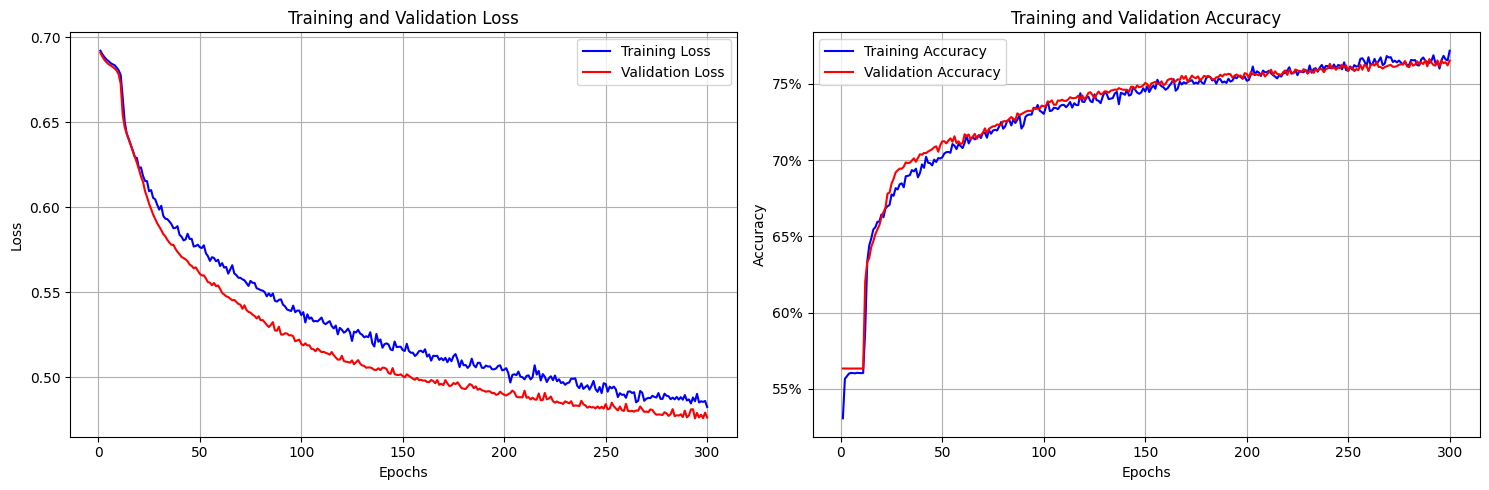

In [51]:
import matplotlib.pyplot as plt
import numpy as np

def plot_training_metrics(train_loss, train_acc, val_loss, val_acc):
    """
    Plot training and validation metrics on two subplots.

    Args:
        train_loss: Array of training loss values
        train_acc: Array of training accuracy values
        val_loss: Array of validation loss values
        val_acc: Array of validation accuracy values
    """
    # Create figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot epochs on x-axis
    epochs = range(1, len(train_loss) + 1)

    # First subplot: Loss
    ax1.plot(epochs, train_loss, 'b-', label='Training Loss')
    ax1.plot(epochs, val_loss, 'r-', label='Validation Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    # Second subplot: Accuracy
    ax2.plot(epochs, train_acc, 'b-', label='Training Accuracy')
    ax2.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    # Add accuracy percentage labels
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

    # Adjust layout to prevent overlap
    plt.tight_layout()

    return fig

# Usage example:
plot_training_metrics(train_loss_history, train_acc_history, val_loss_history, val_acc_history)
plt.show()

In [61]:
def predict_sentences(model, sentences, vocab, max_len, device='cuda', threshold=0.5):
    """
    Make predictions for new sentences and interpret results
    """
    # Preprocess
    sequences = texts_to_sequences(sentences, vocab)
    padded = pad_sequences(sequences, max_len)
    #print(padded)

    # Convert to tensor
    input_ids = torch.tensor(padded, dtype=torch.long).to(device)

    # Get predictions
    model.eval()
    with torch.no_grad():
        outputs = model(input_ids)
        print(outputs)
        probabilities = outputs.squeeze().cpu().numpy()
        predictions = (probabilities >= threshold).astype(int)

    # Print results
    for sentence, prob, pred in zip(sentences, probabilities, predictions):
        print(f"\nText: {sentence}")
        print(f"Probability: {prob:.4f}")
        print(f"Classification: {'Sarcastic' if pred == 1 else 'Not Sarcastic'}")
        print("-" * 80)

test_sentences = ["It Was, For, Uh, Medical Reasons, Says Doctor To Boris Johnson, Explaining Why They Had To Give Him Haircut",
             "It's a beautiful sunny day",
             "I lived in Ireland, so in high school they made me learn to speak and write in Gaelic",
             "Census Foot Soldiers Swarm Neighborhoods, Kick Down Doors To Tally Household Sizes"]

# Example usage:
model = model.to(device)
predict_sentences(
    model=model,
    sentences=test_sentences,
    vocab=word_index,
    max_len=85,
    threshold=0.5  # Adjust this threshold if needed
)

tensor([[0.9316],
        [0.1603],
        [0.6959],
        [0.9594]], device='cuda:0')

Text: It Was, For, Uh, Medical Reasons, Says Doctor To Boris Johnson, Explaining Why They Had To Give Him Haircut
Probability: 0.9316
Classification: Sarcastic
--------------------------------------------------------------------------------

Text: It's a beautiful sunny day
Probability: 0.1603
Classification: Not Sarcastic
--------------------------------------------------------------------------------

Text: I lived in Ireland, so in high school they made me learn to speak and write in Gaelic
Probability: 0.6959
Classification: Sarcastic
--------------------------------------------------------------------------------

Text: Census Foot Soldiers Swarm Neighborhoods, Kick Down Doors To Tally Household Sizes
Probability: 0.9594
Classification: Sarcastic
--------------------------------------------------------------------------------
